In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate





path=Path('C:/Users/Mikhail/Desktop/jupyter fast ai/MNIST/')

df = pd.read_csv(path/'cleaned.csv')
df.head()

,name,label
0,train\0\1.jpg,0
1,train\0\10010.jpg,0
2,train\0\10017.jpg,0
3,train\0\10039.jpg,0
4,train\0\10043.jpg,0


In [3]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'cleaned.csv')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

tfms=get_transforms(do_flip=True, max_zoom=1.2)

data_clean = (src.transform(tfms, size=28)
        .databunch(bs=64).normalize(imagenet_stats))

In [4]:
data_clean.classes, data_clean.c, len(data_clean.train_ds), len(data_clean.valid_ds)

(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 10, 26860, 6715)

In [5]:
learn = cnn_learner(data_clean, models.resnet50, metrics=error_rate)

#learn_cln_2 =learn.load('C:/Users/Mikhail/Desktop/jupyter fast ai/MNIST/train/models/stage-1')

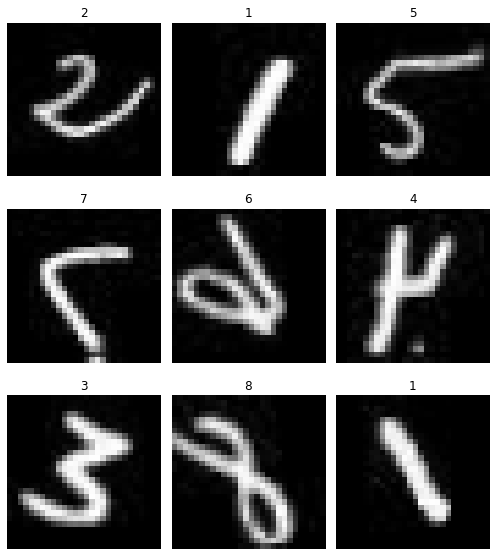

In [6]:
data_clean.show_batch(rows=3, figsize=(7,8))

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


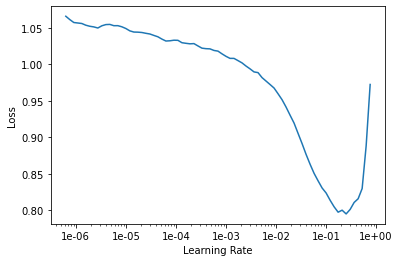

In [7]:
learn.lr_find()

learn.recorder.plot()

In [11]:
learn.fit_one_cycle(5, max_lr=(1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,0.170376,0.103319,0.910380,01:29
1,0.150305,0.245738,0.888861,01:30
2,0.107041,0.076525,0.903172,01:32
3,0.054571,0.028091,0.908950,01:30
4,0.033235,0.253769,0.903797,01:28


In [18]:
learn_cln_2.unfreeze()

In [19]:
learn_cln_2.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.018026,0.009936,0.902457,01:42
